# Unsupervised Learning and Clustering

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
import spacy    

In [48]:
df = pd.read_csv('data_features', index_col = 0)  
df_tokens = pd.read_csv('data_clean', index_col = 0)
df_topics = pd.read_csv('data_topics', index_col=0)

df['Tokens'] = df_tokens['Stems'].values
df['Topics'] = df_topics['Dominant_Topic'].astype(str)

## Text Vectorization with spacy

In [49]:
nlp = spacy.load('en_core_web_sm')

def cat_vectorizer(category):  
    vectors = nlp(category).vector  
    return vectors 

df['Token Vectors'] = df_tokens.Stems.astype(str).apply(lambda x: cat_vectorizer(x))
df

,Text,Category,Grade,Word Count,Lexile,Type,General Category,Named Entities,Polarity,subjectivity,Tokens,Topics,Token Vectors
An Unlikely Parasite: The Mistletoe,"During the holidays, many people hang mistleto...",Life Science,3.0,303.0,790.0,Nonfiction,Life Science,4,0.146667,0.354583,during the holiday many people hang mistletoe ...,1.0,"[-0.34227753, 0.39585334, 0.28558284, -0.10435..."
The Song of Wandering Aengus,"I went out to the hazel wood,,Because a fire w...",Poetry,7.0,165.0,NaN,Poetry,Poetry,5,0.010417,0.275000,i go out to the hazel woodbecause a fire be in...,8.0,"[0.24700405, 0.27264512, 0.42184576, -0.077530..."
Thanksgiving: Fact or Fiction,This article is provided courtesy of History.c...,U. S. History,7.5,1217.0,1460.0,Nonfiction,U. S. History,179,0.119618,0.433465,this article be provide courtesy of historycom...,18.0,"[-0.05775185, 0.03324184, 0.18752049, 0.261507..."
Native American Conflicts,"Jamestown logo for World's Fair in 1907,Prior ...","Geography& Societies, U. S. History",9.5,554.0,1340.0,Nonfiction,Geography& Societies,65,0.105740,0.360446,jamestown logo for world fair in to european...,18.0,"[-0.22465332, 0.24646375, 0.14566308, -0.25918..."
A Monument for Peace,"In December, 1864, the Civil War was nearly ov...","Arts& Culture, U. S. History",6.5,517.0,910.0,Nonfiction,Arts& Culture,58,0.102357,0.381615,in december the civil war be nearly over the...,0.0,"[-0.057941884, 0.3657138, 0.4024177, -0.026276..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Martin Luther King Jr.,Martin Luther King Jr. was a leader. When he w...,U. S. History,1.0,87.0,470.0,Nonfiction,U. S. History,8,0.294378,0.644082,martin luther king jr be a leader when -PRON- ...,18.0,"[0.025266115, 0.19975525, 0.2789527, -0.493625..."
Native American Powwows,Some Native Americans hold powwows today. Thes...,"Arts& Culture, Geography& Societies",1.0,96.0,660.0,Nonfiction,Arts& Culture,19,0.071851,0.364643,some native americans hold powwow today these ...,18.0,"[-0.040409777, 0.3233517, -0.6122765, -0.48917..."
What is a Talking Stick?,"Photo Credit: Library of Congress, ,For hundre...","Arts& Culture, Geography& Societies",1.0,108.0,550.0,Nonfiction,Arts& Culture,7,0.312500,0.500000,photo credit library of congress for hundred o...,10.0,"[-0.43033382, 0.1741459, -0.22005571, -0.23368..."
People Need the Ocean,People today could not live without the ocean....,Geography& Societies,1.0,119.0,460.0,Nonfiction,Geography& Societies,2,0.103409,0.484375,people today could not live without the ocean ...,4.0,"[-0.40385836, 0.48310435, 0.30011526, -0.56031..."


In [52]:
# Reordering dataframe  
df.dropna(inplace = True)
df_features = df[['General Category', 'Topics', 'Type', 'Token Vectors', 'Word Count','Lexile','Named Entities', 'Polarity', 'subjectivity']]
df_features = pd.concat([df_features['Token Vectors'].apply(pd.Series), df_features], axis = 1)
df_features.drop('Token Vectors', axis = 1, inplace = True)  
text_series = df.Text.values

In [53]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,94,95,General Category,Topics,Type,Word Count,Lexile,Named Entities,Polarity,subjectivity
An Unlikely Parasite: The Mistletoe,-0.342278,0.395853,0.285583,-0.104354,1.114035,0.285716,0.309170,0.419614,1.126946,1.624934,...,0.856808,0.413605,Life Science,1.0,Nonfiction,303.0,790.0,4,0.146667,0.354583
Thanksgiving: Fact or Fiction,-0.057752,0.033242,0.187520,0.261508,1.349367,0.715047,0.301719,0.270407,1.022321,1.666260,...,0.829674,0.544154,U. S. History,18.0,Nonfiction,1217.0,1460.0,179,0.119618,0.433465
Native American Conflicts,-0.224653,0.246464,0.145663,-0.259182,1.087971,0.477442,0.415843,0.240627,0.739667,1.504107,...,0.715090,0.403136,Geography& Societies,18.0,Nonfiction,554.0,1340.0,65,0.105740,0.360446
A Monument for Peace,-0.057942,0.365714,0.402418,-0.026276,1.064788,0.495626,0.418118,0.359706,1.069138,1.488384,...,0.481382,0.488230,Arts& Culture,0.0,Nonfiction,517.0,910.0,58,0.102357,0.381615
Pictures of the Year,-0.259325,0.376053,0.087589,-0.178584,0.887102,0.585778,0.418058,0.560297,1.100379,1.647291,...,0.917120,0.719650,Arts& Culture,14.0,Nonfiction,206.0,730.0,14,0.230267,0.538781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Martin Luther King Jr.,0.025266,0.199755,0.278953,-0.493625,0.341537,0.305174,0.922385,0.698559,0.631938,1.042366,...,0.463199,0.265253,U. S. History,18.0,Nonfiction,87.0,470.0,8,0.294378,0.644082
Native American Powwows,-0.040410,0.323352,-0.612276,-0.489180,1.001245,0.627791,0.295430,0.418945,0.775842,0.995489,...,0.511920,0.750462,Arts& Culture,18.0,Nonfiction,96.0,660.0,19,0.071851,0.364643
What is a Talking Stick?,-0.430334,0.174146,-0.220056,-0.233683,0.610118,0.512296,0.153903,0.118790,1.320313,1.404993,...,0.683631,0.414134,Arts& Culture,10.0,Nonfiction,108.0,550.0,7,0.312500,0.500000
People Need the Ocean,-0.403858,0.483104,0.300115,-0.560314,0.842832,0.061794,0.572833,0.407493,1.363082,1.810731,...,0.767891,0.208269,Geography& Societies,4.0,Nonfiction,119.0,460.0,2,0.103409,0.484375


## K-Prototype Clustering

In [54]:
kproto = KPrototypes(n_clusters = 25, init = "Cao", verbose = 2)
clusters = kproto.fit_predict(df_features, categorical = [96,97,98]) 

df_features['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

In [55]:
df_features.groupby(['Cluster']).mean()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,Word Count,Lexile,Named Entities,Polarity,subjectivity
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.034435,0.126023,0.237622,0.001642,1.183566,0.609971,0.315487,0.497725,0.979832,1.608805,...,-0.345311,-0.513540,1.333495,0.783876,0.425655,232.724138,1087.206897,20.082759,0.142963,0.440040
1,-0.076638,0.289962,0.207960,-0.269366,1.004832,0.480561,0.442463,0.506203,0.979922,1.504444,...,-0.282384,-0.590452,1.298047,0.653389,0.391596,569.760684,892.905983,41.153846,0.116013,0.452609
2,-0.017641,0.407509,0.256344,-0.540223,0.852945,0.407084,0.551076,0.599037,0.960973,1.310288,...,-0.355077,-0.849767,1.228990,0.435604,0.344677,773.687500,581.875000,37.250000,0.100659,0.495659
3,0.067622,0.322737,0.306537,-0.427667,0.888694,0.500518,0.527643,0.573717,1.004419,1.298212,...,-0.394339,-0.801099,1.262768,0.379874,0.364980,364.886364,413.636364,15.340909,0.106543,0.485118
4,-0.046891,0.347492,0.247157,-0.344442,0.948980,0.384512,0.486392,0.555148,0.934556,1.459068,...,-0.318642,-0.713917,1.242357,0.642869,0.340828,804.858974,867.307692,45.012821,0.093966,0.459761
5,-0.073172,0.272723,0.252632,-0.114024,1.181327,0.516008,0.360463,0.464637,0.939594,1.628285,...,-0.311453,-0.467639,1.353613,0.777435,0.412327,760.837209,1355.581395,62.069767,0.114608,0.437979
6,-0.082546,0.288960,0.122762,-0.350215,0.858738,0.441354,0.485985,0.605801,1.048682,1.443490,...,-0.321075,-0.770556,1.200343,0.586862,0.417984,107.950192,390.919540,5.923372,0.160469,0.462079
7,-0.076022,0.195653,0.167885,-0.141376,1.228155,0.559706,0.339432,0.388801,0.983682,1.621915,...,-0.262701,-0.472040,1.345802,0.738885,0.333389,380.194444,1354.722222,38.805556,0.111048,0.407810
8,-0.088396,0.265034,0.185730,-0.191715,1.095897,0.487770,0.409059,0.488498,0.968398,1.586002,...,-0.276408,-0.570106,1.312249,0.728177,0.396975,470.164557,1103.291139,36.063291,0.113282,0.442387


## Visualizing Clusters

In [56]:
import plotly.express as px
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import cufflinks as cf 

In [57]:
fig1 = px.scatter_3d(df_features, x='Word Count', y='Lexile', z='Named Entities', color='Cluster')

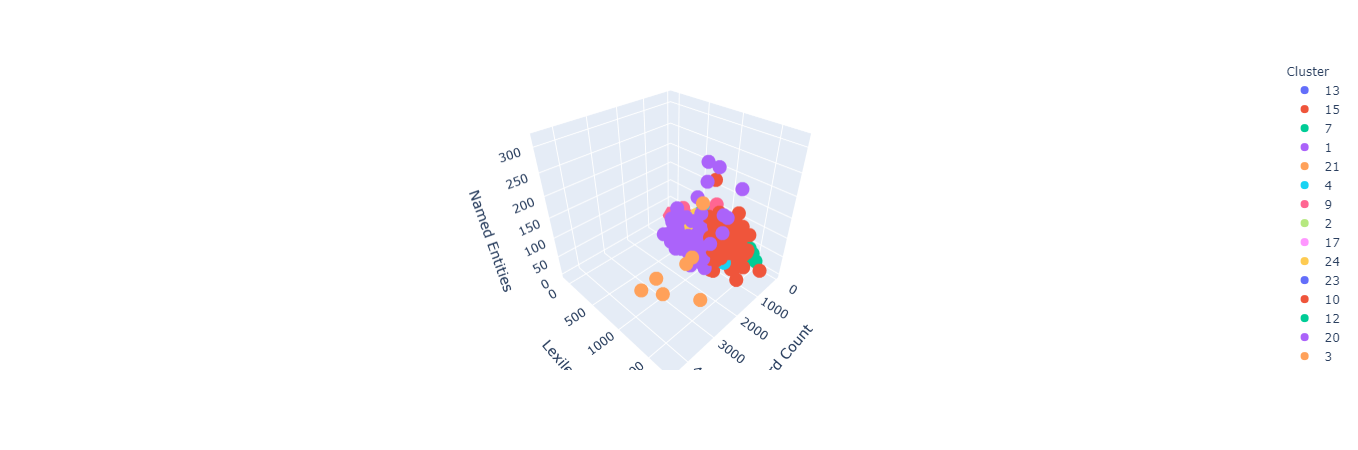

In [58]:
fig1.show()

Examining the visualization, we can see that clusters 2, 3, 10, 12, and 24 are most ideal for our article selections.

In [69]:
df_features.loc[df_features['Cluster'].isin(['2', '3', '10','12','24'])]

,0,1,2,3,4,5,6,7,8,9,...,General Category,Topics,Type,Word Count,Lexile,Named Entities,Polarity,subjectivity,Cluster,Text
Happy Trails,0.216866,0.089713,0.441626,-0.130831,1.028123,0.551318,0.336936,0.478055,0.917303,1.228636,...,Narrative Fiction,12.0,Fiction,695.0,680.0,46,0.177540,0.450426,2,"The morning she left for Camp Kanawa, Maria aw..."
Learning on the Soccer Field,-0.111414,0.414112,0.402704,-0.195860,1.079978,0.370047,0.480748,0.425686,0.867726,1.221573,...,Sports,11.0,Fiction,482.0,760.0,46,0.104275,0.473046,24,Gustavo’s favorite sport is soccer. When he wa...
Solids and Liquids,-0.381107,1.003075,0.250583,-0.961155,0.846662,-0.169768,0.648157,0.726181,0.836943,1.535468,...,Physical Science,4.0,Nonfiction,111.0,480.0,0,0.050000,0.550000,10,"What do shoes, paper, and cheese all have in c..."
Hiking the Appalachian Trail,0.209099,0.137796,0.347756,-0.541298,1.019769,0.700817,0.334535,0.487412,1.039128,1.215213,...,Sports,2.0,Fiction,203.0,620.0,24,0.173636,0.389621,12,Eight-year-old Maya and her parents were on va...
My Bean Plant,-0.047142,0.408756,-0.046782,-0.545150,0.735228,-0.266964,0.725052,0.751280,0.885899,1.180178,...,Life Science,5.0,Fiction,169.0,540.0,8,0.180671,0.422222,10,My grandfather loves to grow plants. He raises...
Cindy Goes to Salvador,0.123552,0.332653,0.097461,-0.664708,0.665133,0.502988,0.743409,0.695371,1.061830,1.361713,...,Technology& Engineering,14.0,Fiction,558.0,380.0,30,0.297904,0.600997,3,"Joanna said, “Cindy is going to Brazil next Fr..."
Got Allergies?,-0.020307,0.537029,0.131809,-0.330619,0.963549,0.280180,0.642880,0.694511,0.884506,1.639591,...,Sports,7.0,Nonfiction,396.0,730.0,24,0.018538,0.516146,24,More people in the United States have allergie...
'My Life Hasn't Changed',0.099533,0.155982,0.187321,-0.250767,0.868864,0.501416,0.513274,0.592806,1.194761,1.320960,...,Sports,11.0,Nonfiction,512.0,610.0,48,0.167613,0.421993,24,Australian Paralympic Committee (CC BY-SA 3.0)...
The Treasure Hunt,-0.074872,0.027395,0.099383,-0.300421,0.844622,0.488245,0.463894,0.423081,1.046149,1.296362,...,Geography& Societies,12.0,Fiction,551.0,740.0,20,0.141909,0.369865,24,Jordan loves to use clues to solve riddles. Th...
I Want a Phone!,0.023240,0.719036,0.482189,-1.002636,0.696497,0.290065,0.845382,0.562506,1.004713,1.189258,...,Narrative Fiction,12.0,Fiction,454.0,510.0,9,-0.100431,0.569361,3,"“I want a phone!” said Myrna.,“I bet you do,” ..."


In [73]:
df_features['Text'] = text_series 
df_clusters = df_features[['Text', 'Type', 'General Category', 'Word Count','Lexile', 'Named Entities', 'Cluster']].loc[df_features['Cluster'].isin(['2', '3', '10','12','24'])]

In [77]:
writer = pd.ExcelWriter(r'english_articles.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
df_clusters.to_excel(writer)
writer.close()